# Building Classification Machine Learning Model for AXA Mansard Medical Insurance

<p style = 'text-align: justify;'>You work as an analyst in the marketing department of a company that promotes various medical insurance in Nigeria. Your manager is unhappy with the low sales volume of a specific kind of insurance. The data engineer provides you with a sample dataset for those that visit the company website for medical insurance. The intent of this notebook is to examine and analyse the effect of an imbalanced data on the common classification evaluation metrics of a machine learning algorithm, for this exercise we would be using the Linear regression algorithm to study effect of balancing our target variables on the Accuracy and F1-score.</p> 

### Import Python Modules

We need to import some packages that will enable us to explore the data and build machine learning models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings #To get rid of warnings
warnings.filterwarnings('ignore')


**Importing our dataset**

In [3]:
insurance = pd.read_csv('insurance.csv')
insurance

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
...,...,...,...,...,...
395,15691863,Female,46,41000,purchased
396,15706071,Male,51,23000,purchased
397,15654296,Female,50,20000,purchased
398,15755018,Male,36,33000,not-purchased


In [4]:
insurance.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
5,15728773,Male,27,58000,not-purchased
6,15598044,Female,27,84000,not-purchased
7,15694829,Female,32,150000,purchased
8,15600575,Male,25,33000,not-purchased
9,15727311,Female,35,65000,not-purchased


In [5]:
insurance.shape

(400, 5)

We have 5 variables and 400 instances of those that want to buy medical insurance or not in the data. The User ID is a random number generated for every customer that comes to the company for medical insurance. Therefore it is not useful in predicting whether the person will buy medical or not. We will there remove the variable User ID from the data.

In [6]:
insurance.describe().apply(lambda s: s.apply(lambda x: format(x, '.0f')))

,User ID,Age,EstimatedSalary
count,400,400,400
mean,15691540,38,69742
std,71658,10,34097
min,15566689,18,15000
25%,15626764,30,43000
50%,15694342,37,70000
75%,15750363,46,88000
max,15815236,60,150000


From our descriptive analysis above we can see that we dont any `missing values` in our dataset, so there would not any need for `data cleaning` in this case

In [7]:
insurance.drop(['User ID'], axis = 1, inplace=True)

In [8]:
insurance.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased
5,Male,27,58000,not-purchased
6,Female,27,84000,not-purchased
7,Female,32,150000,purchased
8,Male,25,33000,not-purchased
9,Female,35,65000,not-purchased


## One Hot Encoding

We want to transform or recode the label Purchased to have 1 for those that bought the insurance and 0 for those that did not purchase the insurance. This will transform the output variable label to be numeric.

In [9]:
insurance['Purchased'] = insurance['Purchased'].apply(lambda x: 1 if x == 'purchased' else 0)

In [10]:
insurance.head(11)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


Now we have 3 features that include `gender`, `age`, and `salary` while purchased is the label in the data. Since the label has just two classes of categories (purchased(1) and not-purchased(0), this is a binary classification problem.

## Exploratory Data Analysis

Facts generated by data exploratory will help us to know those features that can predict whether a person will purchase medical insurance or not. Let us start by visualizing the proportion of those that want to buy medical insurance or not

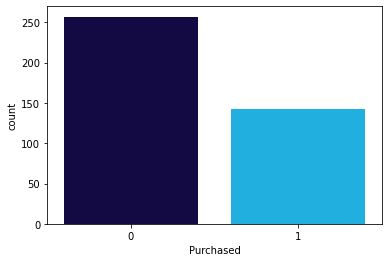

In [120]:
color  = ['#3355FF','#00FF00','#0D004D','#00bfff','#ffcc99','#006600']
sns.countplot(x='Purchased', data = insurance, palette = color[2:4]);

as we can see majority of those that visit the medical insurance company did not want to buy the insurance. This is an imbalanced dataset, that is there is no equal of proportion of those that will buy or not.

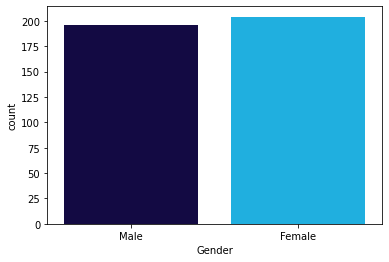

In [26]:
sns.countplot(x = 'Gender', data = insurance, palette = color[2:4]);

the proportion of males and female are almost equal

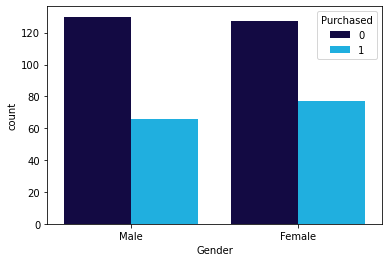

In [30]:
sns.countplot(x = 'Gender', hue = 'Purchased', data = insurance,palette = color[2:4]);

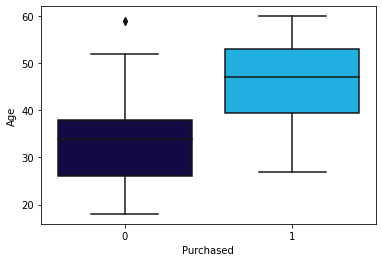

In [38]:
sns.boxplot(x = "Purchased", y = "Age", data = insurance, palette = color[2:4]);

From the look of things it seems like younger people are not interested in the medical insurance

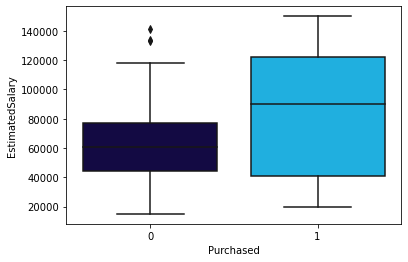

In [39]:
sns.boxplot(x="Purchased", y = "EstimatedSalary", data = insurance, palette = color[2:4]);

People that earned higher salary purchased the insurance while those that earned low did not purchase the insurance. ofcourse it is expected that to purchase a medical insurance when you have money.

# Model Building

In [40]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

Now is the time to build machine learning models for the task of predicting whether the customer will buy medical insurance or not. Therefore, we shall seperate the set of features (X) from the label (Y).

### IMBALANCED DATASET

In [41]:
#Split data into features and target

x = insurance.drop(["Purchased"], axis=1) #dropping the label variable (Purchased from the data)

y = insurance["Purchased"]

In [42]:
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

### One-hot encoding

we need to create a one-hot encoding for all the categorical features in the data because some algorithm cannot work with categorical data directly. They require all input variable and output to be numeric, in this case, we will create a one-hot encoding for the gender feature by using `pd.get_dummies().

In [44]:
pd.get_dummies(insurance["Gender"])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


in fact `pd.get_dummies()` is very powerful to actually locate the categorical features and create a one-hot encoding for them. For example:

In [45]:
pd.get_dummies(x)

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


 We can now save this result of one-hot encoding into x

In [46]:
x = pd.get_dummies(x)

## Splitting the data into training and test set

As discussed earlier we will split our dataset (Features(X) and Label(Y)) into training and test data by using `train_test_split()` function from sklearn. The training set will be 80% while the test data will be 20%. `The random_state` that is set to 1234 is for all of us to have the same set of data.

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 1234)

We now have the pair of training data `(x_train,y_train)` and testing data `(x_test, y_test)`

We will use the training data to build the model and then use test data to make prediction and evaluation respectively

Lets train a logistic regression model with our training data. We need to import the Logistic regression from the sklearn model

In [48]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression

We now create an object of class `LogisticRegression()` to train the model on

In [49]:
logisticmodel = LogisticRegression()
logisticmodel.fit(x_train,y_train)

LogisticRegression()

`logisticmodel.fit` trained the Logistic regression model. The model is now ready to make prediction for the unknown label by using only the features from the test data `(x_test)`

In [50]:
logistic_prediction = logisticmodel.predict(x_test)
logistic_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Let's save the prediction result into `logistic_prediction`. This is what the model predicted for us

### Model Evaluation

Since we know the true label in the test set(i.e. `y_test`). we can compare the prediction with it, hence evaluate the logistic model i have created a function that will help you visualize a confusion matrix for the logistic model and you can call it, henceforth to check the performance of any model.

In [51]:
def ConfusionMatrix(ytest, ypred, label = ['Negative', 'Positive']):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'Blues_r')
    plt.xlabel('Predicted',font = 'Century Gothic', fontsize = 13)
    plt.ylabel('Actual', font = 'Century Gothic', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.title('Confusion matrix', font = "Century Gothic", fontsize = 17,fontweight = 'bold');

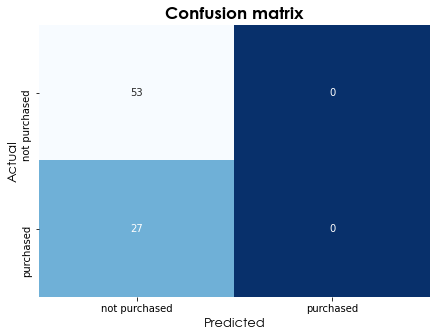

In [52]:
ConfusionMatrix(y_test, logistic_prediction, label = ["not purchased", "purchased"])

# Interpretation of the Logistic Regression Model Evaluation Performance

- There are 53 True Negatives (TN):predicting that customers will not buy the insurance and truly the customers did not buy the insurance.



- There 27 False Negative(FN):predicting that the customer will not buy the insurance and the customers actually bought the insurance.



- There are 0 True Positives(TP): predicting that the customer will buy the insurance and they actually buy the insurance.



- There are also 0 False Positives (FP): predicting that the customer will buy the insurance and in actualty the customer did not buy it.

Based on the confusion matrix, we can see that although performed very well in predicting the negative cases, it performed terribly in predicting positive cases.

In [53]:
metrics.accuracy_score(y_test, logistic_prediction)

0.6625

The accuracy of the model is 66.25%. We cannot trust this accuracy since the data is imbalanced. Therefore, we are going to use F1 score instead.

In [54]:
metrics.f1_score(y_test, logistic_prediction)

0.0

As you can see from the confusion matrix and the F1 score, this model is not efficient to predict whether or not a customer will buy the insurance. the major source of this problem is that the dataset is imbalanced.

### Effect of Balancing The Target Variable on the Model Performance

In [55]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

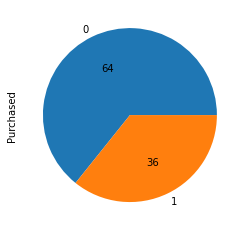

In [194]:
y.value_counts().plot.pie(autopct = '%.0f');

### Random Undersampling
For this balancing method, we are basically going to reduce the size of the majority class, so that `majority class` and `minority class` would be equal

Text(0.5, 1.0, 'Under-sampling')

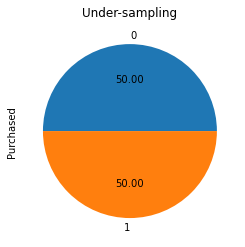

In [57]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)

x_res, y_res = rus.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct="%.2f");
ax.set_title('Under-sampling')

In [58]:
y_res.value_counts()

0    143
1    143
Name: Purchased, dtype: int64

From the Chart above, we can see that our dataset is now balanced, we reduced the `majority class` to the level of the `minority class`.

### Random Oversampling
In these case, we are going to increase the `minority class` to the level of the `majority class`.

In [59]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

Text(0.5, 1.0, 'Over-sampling')

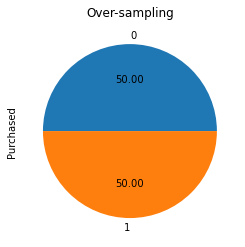

In [60]:
from imblearn.over_sampling import RandomOverSampler

#rus = RandomOverSampler(sampling_strategy = 1)
ros = RandomOverSampler(sampling_strategy = 'not majority') #String

x_ros, y_ros = ros.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct = '%.2f')
ax.set_title('Over-sampling')

In [61]:
y_ros.value_counts()

0    257
1    257
Name: Purchased, dtype: int64

## Building the Linear Regression Model With the Balanced Datasets

### Random Oversampled Dataset

In [62]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [63]:
x_trainn,x_testt,y_trainn,y_testt = train_test_split(x_ros, y_ros, test_size=0.2, random_state = 1234)

In [64]:
print(f'the shape of the x_train data is {x_trainn.shape}')
print(f'the shape of the y_train data is {y_trainn.shape}')
print(f'the shape of the x_test data is {x_testt.shape}')
print(f'the shape of the y_test data is {y_testt.shape}')

the shape of the x_train data is (411, 4)
the shape of the y_train data is (411,)
the shape of the x_test data is (103, 4)
the shape of the y_test data is (103,)


In [65]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression

In [66]:
logisticmodel = LogisticRegression()
logisticmodel.fit(x_trainn,y_trainn)

LogisticRegression()

In [67]:
logistic_prediction = logisticmodel.predict(x_testt)
logistic_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

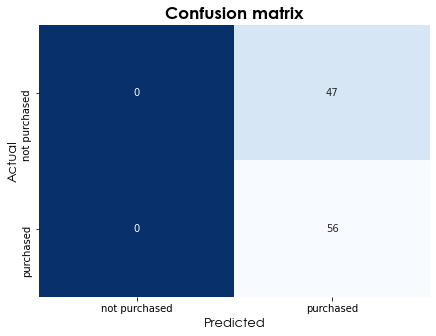

In [68]:
ConfusionMatrix(y_testt, logistic_prediction, label = ["not purchased", "purchased"])

In [69]:
metrics.accuracy_score(y_testt, logistic_prediction)

0.5436893203883495

In [70]:
metrics.f1_score(y_testt, logistic_prediction)

0.7044025157232704

### Random Undersampled Dataset

In [68]:
x_trainn,x_testt,y_trainn,y_testt = train_test_split(x_res, y_res, test_size=0.2, random_state = 1234)

In [69]:
print(f'the shape of the x_train data is {x_trainn.shape}')
print(f'the shape of the y_train data is {y_trainn.shape}')
print(f'the shape of the x_test data is {x_testt.shape}')
print(f'the shape of the y_test data is {y_testt.shape}')

the shape of the x_train data is (228, 4)
the shape of the y_train data is (228,)
the shape of the x_test data is (58, 4)
the shape of the y_test data is (58,)


In [71]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression

In [72]:
logisticmodel = LogisticRegression()
logisticmodel.fit(x_trainn,y_trainn)

LogisticRegression()

In [73]:
logistic_prediction = logisticmodel.predict(x_testt)
logistic_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

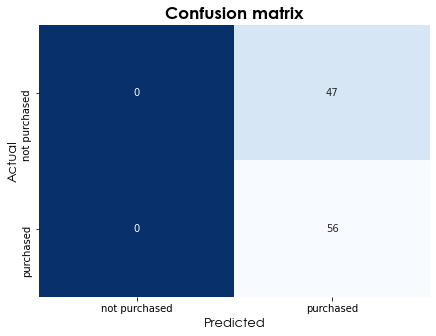

In [74]:
ConfusionMatrix(y_testt, logistic_prediction, label = ["not purchased", "purchased"])

In [75]:
metrics.accuracy_score(y_testt, logistic_prediction)

0.5436893203883495

In [76]:
metrics.f1_score(y_testt, logistic_prediction)

0.7044025157232704

In [163]:
data = {'Accuracy':[0.663, 0.543, 0.465], 'F1-Score': [0.000,0.704, 0.635]}

dat = pd.DataFrame(data, index = ['Imbalanced Dataset','Oversampled Dataset', 'Undersampled Dataset'])
dat

,Accuracy,F1-Score
Imbalanced Dataset,0.663,0.000
Oversampled Dataset,0.543,0.704
Undersampled Dataset,0.465,0.635


In [165]:
a = list(dat.columns)
a

['Accuracy', 'F1-Score']

### Result and Discussion

In [189]:
hue = a
def plot(name):
    plt.figure(figsize = (8,7), tight_layout = True)
    plt.bar(x = dat.index, height = dat[f'{name}'], color = color[1:4], width = 0.6)
    plt.xticks(fontsize = 9,rotation = 0)
    plt.xlabel('Datasets', fontsize=13, fontweight = 'bold')
    plt.ylabel(f'{name} Score', fontsize=13, fontweight = 'bold')
    plt.title(f'Comparison of {name} Score', fontsize=16, fontweight = 'bold')
    plt.show();

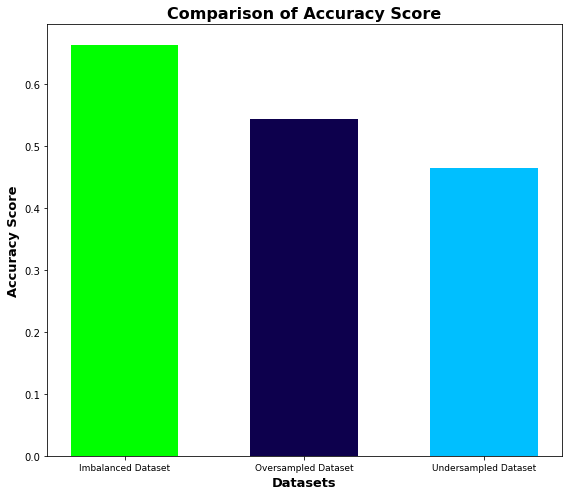

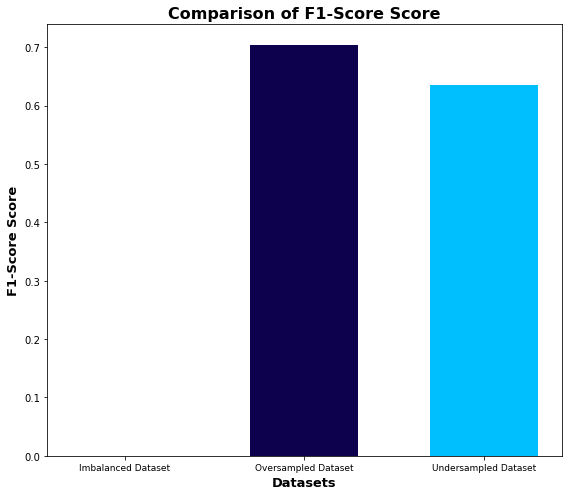

In [190]:
for names in hue:
    plot(names)

From our graphs presented above, The synthetic balancing applied to the datasets reduced the Accuracy of the Oversampled dataset and undersampled dataset by approximately 18% and 30% respectively, while for the F1-Score, the technique drastically increased the values by to 70% for the oversampled dataset and 64% for the Undersampled dataset.

### Conclusion

<p style = 'text-align:justify;'>According to the findings established in this little research, it is safe to posit that best evaluation metric measures for examining classification algorithms is the F1-score, this is attributed to the fact the Accuracy score is biased and does not give a full representation of the holistic perfomance. In addition,It is advisable to carry out random oversampling while intending to balance our dataset, as this would give a higher F1-Score compared to undersampling. Furthermore, Balacing our dataset is a very important practise in Machine learning as this tends to Increase the performance of the model by improving the F1-Score.</p>  